## UTS_202331307_DIMAS DWI AL BUKHORI_B

### Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Membaca Gambar

In [3]:
img = cv2.imread('nama.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Konversi ke HSV

In [5]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

### Deteksi warna

#### Hijau

In [7]:
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)
res_green = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_green)

#### Biru

In [9]:
lower_blue = np.array([100, 100, 50])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
res_blue = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_blue)

#### Merah

In [11]:
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
res_red = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)

### Tampilkan hasil deteksi warna

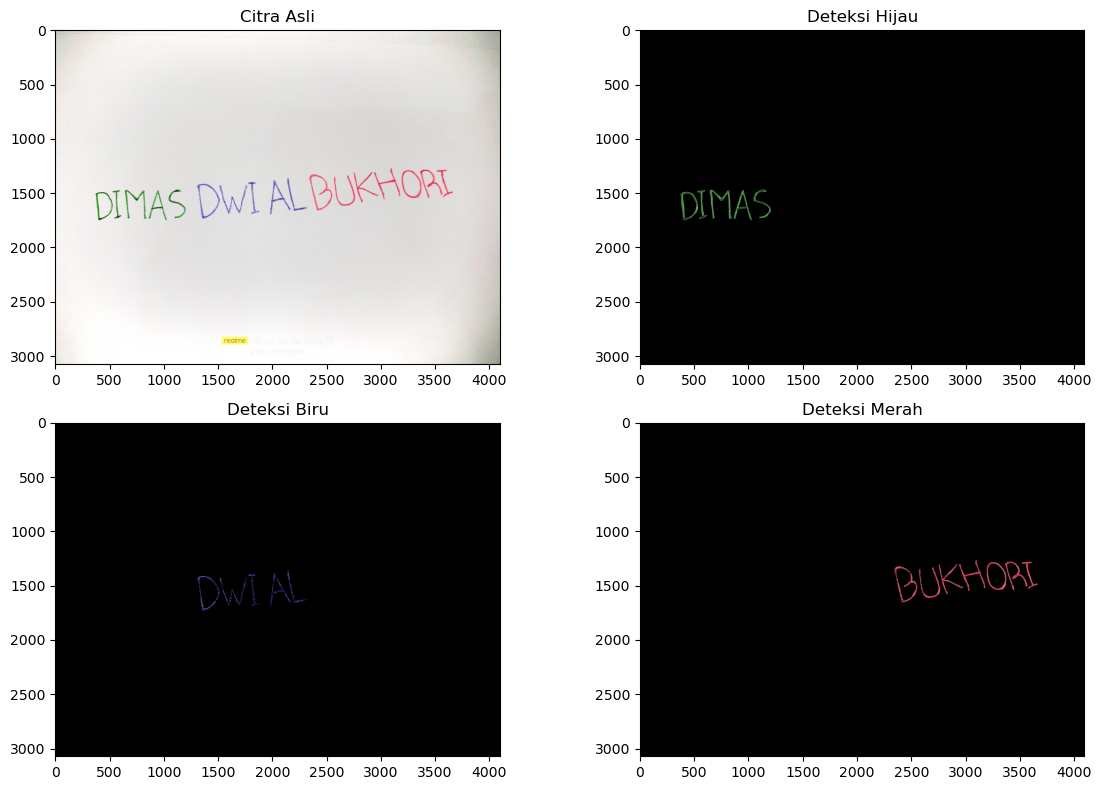

In [46]:
titles = ['Citra Asli', 'Deteksi Hijau', 'Deteksi Biru', 'Deteksi Merah']
images = [img_rgb, res_green, res_blue, res_red]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
plt.tight_layout()
plt.show()

### Nilai Ambang Batas Hijau, Biru, dan Merah

In [52]:
thresholds = [
    ('Merah 1', lower_red1[0], upper_red1[0]),
    ('Hijau', lower_green[0], upper_green[0]),
    ('Biru', lower_blue[0], upper_blue[0]),
    ('Merah 2', lower_red2[0], upper_red2[0])
]

sorted_thresholds = sorted(thresholds, key=lambda x: x[1])

print("Urutan Ambang Batas Berdasarkan Hue:")
for name, low, high in sorted_thresholds:
    print(f"{name}: Hue {low} - {high}")

Urutan Ambang Batas Berdasarkan Hue:
Merah 1: Hue 0 - 10
Hijau: Hue 40 - 80
Biru: Hue 100 - 140
Merah 2: Hue 160 - 180
